# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Carregar a base de dados de gorjetas
tips = sns.load_dataset("tips")

# Criar a variável 'net_bill' que é o valor total da conta menos a gorjeta
tips['net_bill'] = tips['total_bill'] - tips['tip']

In [39]:
# Criar a matriz de design para o modelo com Patsy
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')


In [41]:
# Ajustar o modelo inicial
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           2.64e-20
Time:                        23:13:00   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

In [43]:
# Ajustar o modelo removendo variáveis não significantes
y, X = patsy.dmatrices('tip ~ net_bill', data=tips, return_type='dataframe')
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           5.02e-23
Time:                        23:13:03   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

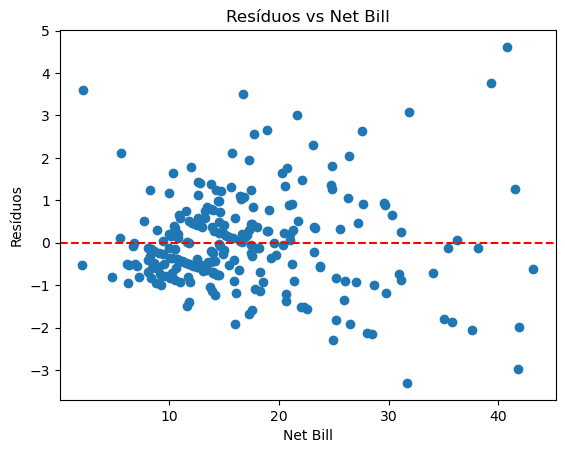

In [45]:
# Gráfico de resíduos em função de net_bill
residuals = model.resid
plt.scatter(tips['net_bill'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Net Bill')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Net Bill')
plt.show()


In [47]:
# Testar transformar net_bill no log
tips['log_net_bill'] = np.log(tips['net_bill'])
y, X = patsy.dmatrices('tip ~ log_net_bill', data=tips, return_type='dataframe')
model_log = sm.OLS(y, X).fit()
print(model_log.summary())

# Testar um polinômio de segundo grau
tips['net_bill_squared'] = tips['net_bill'] ** 2
y, X = patsy.dmatrices('tip ~ net_bill + net_bill_squared', data=tips, return_type='dataframe')
model_poly = sm.OLS(y, X).fit()
print(model_poly.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           4.40e-20
Time:                        23:13:08   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.2575      0.430     -2.924   

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [49]:
# Criar a variável 'tip_pct' que é a porcentagem da gorjeta sobre o valor líquido da conta
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['log_tip'] = np.log(tips['tip'])

# Criar a matriz de design para o modelo com Patsy
y, X = patsy.dmatrices('log_tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')


In [51]:
# Ajustar o modelo inicial
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.21e-18
Time:                        23:13:16   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.

In [53]:
# Ajustar o modelo removendo variáveis não significantes
y, X = patsy.dmatrices('log_tip ~ net_bill', data=tips, return_type='dataframe')
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           2.60e-21
Time:                        23:13:19   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

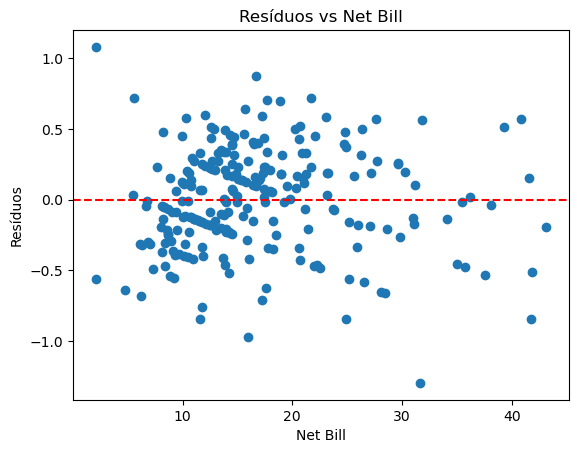

In [55]:
# Gráfico de resíduos em função de net_bill
residuals = model.resid
plt.scatter(tips['net_bill'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Net Bill')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Net Bill')
plt.show()


In [57]:
# Testar transformar net_bill no log
y, X = patsy.dmatrices('log_tip ~ log_net_bill', data=tips, return_type='dataframe')
model_log = sm.OLS(y, X).fit()
print(model_log.summary())

# Testar um polinômio de segundo grau
y, X = patsy.dmatrices('log_tip ~ net_bill + net_bill_squared', data=tips, return_type='dataframe')
model_poly = sm.OLS(y, X).fit()
print(model_poly.summary())


                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           5.62e-22
Time:                        23:13:26   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3942      0.133     -2.961   

In [59]:
# Calcular o R² do modelo final em tip_pct
pred_log_tip = model.fittedvalues
pred_tip = np.exp(pred_log_tip)
r2_tip = r2_score(tips['tip'], pred_tip)
print(f'R² do modelo final para tip: {r2_tip:.4f}')


R² do modelo final para tip: 0.2978


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [63]:
# Carregar a base de dados de previsão de renda
previsao_de_renda = pd.read_csv('previsao_de_renda.csv')


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:13:59   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561

ValueError: x and y must be the same size

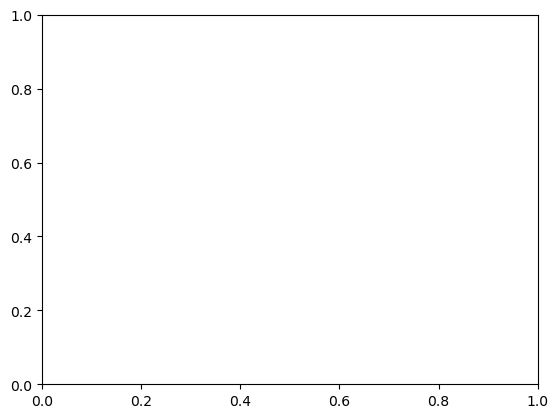

In [65]:
# Ajustar um modelo de regressão linear simples para explicar renda por tempo_emprego
y, X = patsy.dmatrices('renda ~ tempo_emprego', data=previsao_de_renda, return_type='dataframe')
model_simple = sm.OLS(y, X).fit()
print(model_simple.summary())

# Análise de resíduos
residuals = model_simple.resid
plt.scatter(previsao_de_renda['tempo_emprego'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Tempo de Emprego')
plt.show()


In [ ]:
# Ajustar um modelo de regressão linear múltipla para explicar renda
y, X = patsy.dmatrices('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data=previsao_de_renda, return_type='dataframe')
model_multiple = sm.OLS(y, X).fit()
print(model_multiple.summary())

# Remover variáveis não significantes e ajustar novamente o modelo
y, X = patsy.dmatrices('renda ~ sexo + posse_de_veiculo + posse_de_imovel + tipo_renda + educacao + estado_civil + idade + tempo_emprego', data=previsao_de_renda, return_type='dataframe')
model_multiple_refined = sm.OLS(y, X).fit()
print(model_multiple_refined.summary())

# Análise de resíduos
residuals = model_multiple_refined.resid
plt.scatter(previsao_de_renda['tempo_emprego'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Tempo de Emprego')
plt.show()
